In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/stage2024

/content/drive/MyDrive/stage2024


In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16725, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 16725 (delta 11), reused 32 (delta 7), pack-reused 16679
Receiving objects: 100% (16725/16725), 15.31 MiB | 13.87 MiB/s, done.
Resolving deltas: 100% (11490/11490), done.
Updating files: 100% (148/148), done.


In [ ]:
%cd yolov5
!git reset --hard 064365d8683fd002e9ad789c1e91fa3d021b44f0

/content/drive/MyDrive/stage2024/yolov5
Updating files: 100% (145/145), done.
HEAD is now at 064365d8 Update parse_opt() in export.py to work as in train.py (#10789)


In [ ]:
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 41.2 MB/s eta 0:00:00
Setup complete. Using torch 2.3.1+cu121 CPU


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="7JOlg713KphQ50TBhrEP")
project = rf.workspace("cars-fjcrk").project("cars-detecting-and-how-many")
version = project.version(1)
dataset = version.download("yolov5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Cars-detecting-and-how-many-1 in yolov5pytorch:: 100%|██████████| 19868/19868 [02:44<00:00, 120.98it/s]


In [ ]:
%cd yolov5

/content/drive/MyDrive/stage2024/yolov5


In [ ]:
%cat /content/drive/MyDrive/stage2024/yolov5/Cars-detecting-and-how-many-1/data.yaml

names:
- car
nc: 1
roboflow:
  license: CC BY 4.0
  project: cars-detecting-and-how-many
  url: https://universe.roboflow.com/cars-fjcrk/cars-detecting-and-how-many/dataset/1
  version: 1
  workspace: cars-fjcrk
test: ../test/images
train: Cars-detecting-and-how-many-1/train/images
val: Cars-detecting-and-how-many-1/valid/images


In [ ]:
import yaml
import os

data_yaml_path = "/content/drive/MyDrive/stage2024/yolov5/Cars-detecting-and-how-many-1/data.yaml"
with open(data_yaml_path, 'r') as stream:
    data = yaml.safe_load(stream)
    num_classes = str(data['nc'])
print("Number of classes:", num_classes)

Number of classes: 1


In [ ]:
%cat /content/drive/MyDrive/stage2024/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [ ]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
%%writetemplate /content/drive/MyDrive/stage2024/yolov5/models/custom_yolov5s.yaml

nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
 [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [ ]:
%%time
%cd /content/drive/MyDrive/stage2024/yolov5/
!python train.py --img 416 --batch 16 --epochs 25 --data /content/drive/MyDrive/stage2024/yolov5/Cars-detecting-and-how-many-1/data.yaml --cfg ./models/custom_yolov5s.yaml --weights 'yolov5s.pt' --name yolov5s_results  --cache


/content/drive/MyDrive/stage2024/yolov5
2024-07-03 16:54:20.273354: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-03 16:54:20.273421: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-03 16:54:20.275366: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-03 16:54:20.286450: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-

In [ ]:
%pwd

'/content/drive/MyDrive/stage2024/yolov5'

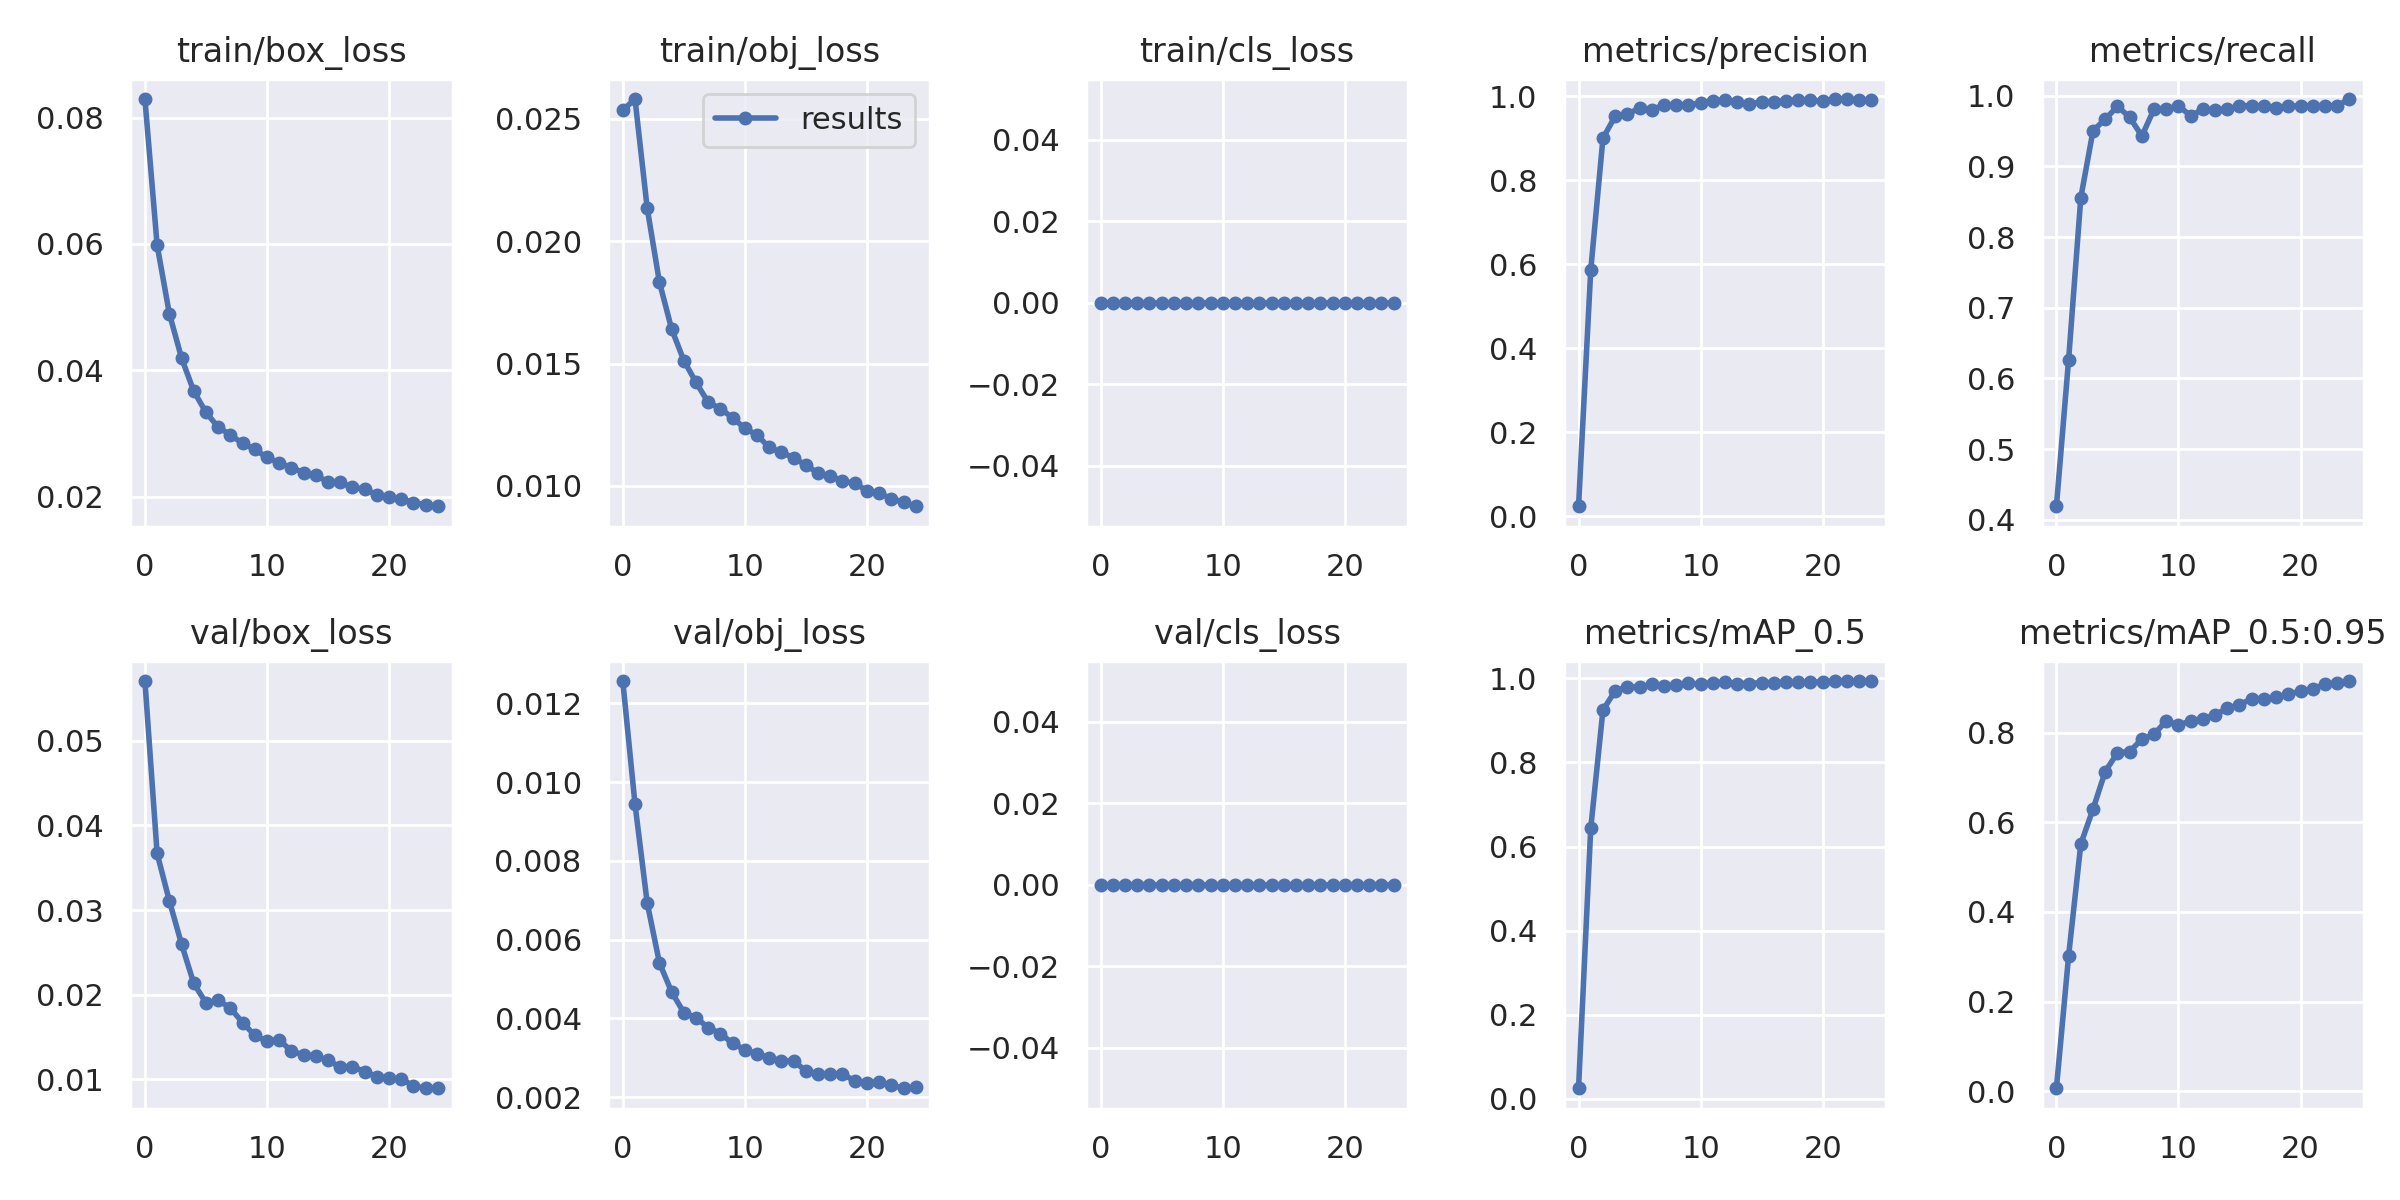

In [ ]:
from utils.plots import plot_results
Image(filename='/content/drive/MyDrive/stage2024/yolov5/runs/train/yolov5s_results/results.png', width=1000)  # view results.png

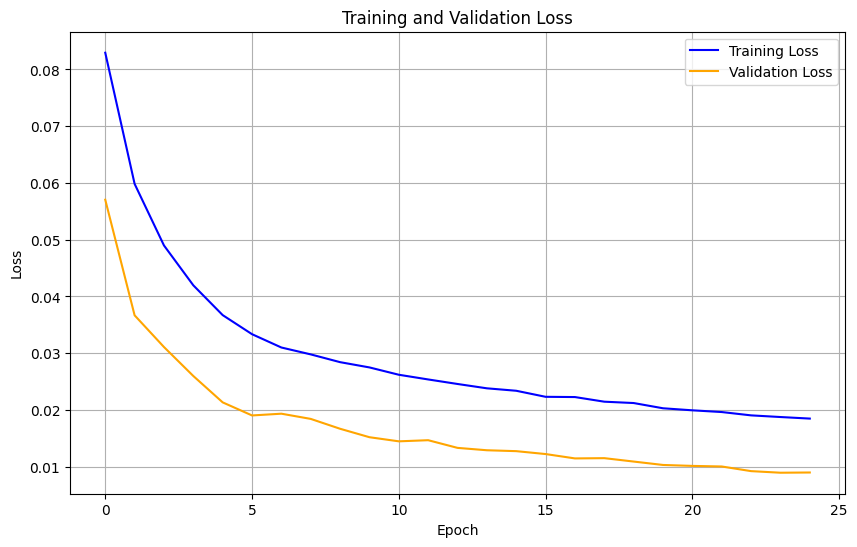

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

results_file = '/content/drive/MyDrive/stage2024/yolov5/runs/train/yolov5s_results/results.csv'
df = pd.read_csv(results_file, skipinitialspace=True)

train_loss = df['train/box_loss']
val_loss = df['val/box_loss']

epochs = df['epoch']
plt.figure(figsize=(10, 6))

plt.plot(epochs, train_loss, label='Training Loss', color='blue')

plt.plot(epochs, val_loss, label='Validation Loss', color='orange')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plot_path = '/content/drive/MyDrive/stage2024/yolov5/runs/train/yolov5s_results/training_validation_loss.png'
plt.savefig(plot_path)

from IPython.display import Image
Image(plot_path)

plt.grid(True)
plt.show()


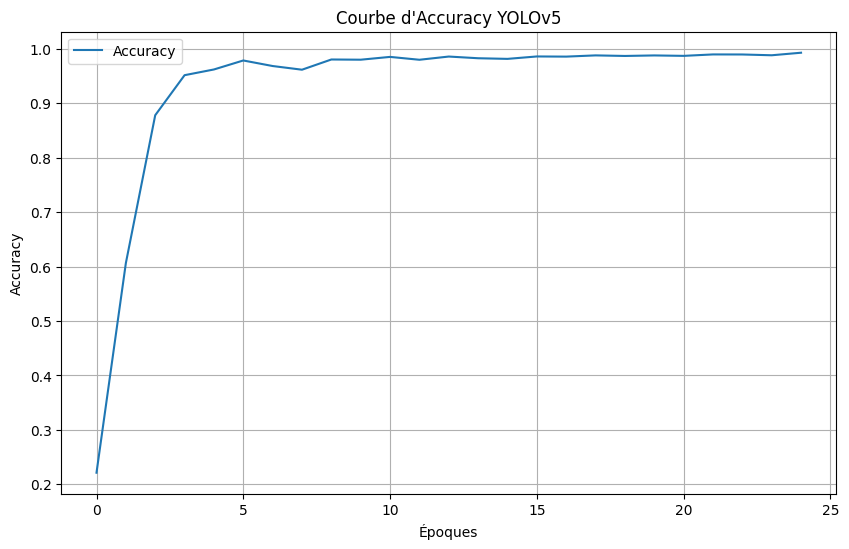

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display

results_path = '/content/drive/MyDrive/stage2024/yolov5/runs/train/yolov5s_results/results.csv'
df = pd.read_csv(results_path)

df['accuracy'] = (df['   metrics/precision'] + df['      metrics/recall']) / 2

plt.figure(figsize=(10, 6))

plt.plot(df['accuracy'], label='Accuracy')

plt.title('Courbe d\'Accuracy YOLOv5')
plt.xlabel('Époques')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plot_path = '/content/drive/MyDrive/stage2024/yolov5/runs/train/yolov5s_results/accuracy_plot.png'
plt.savefig(plot_path)
plt.show()



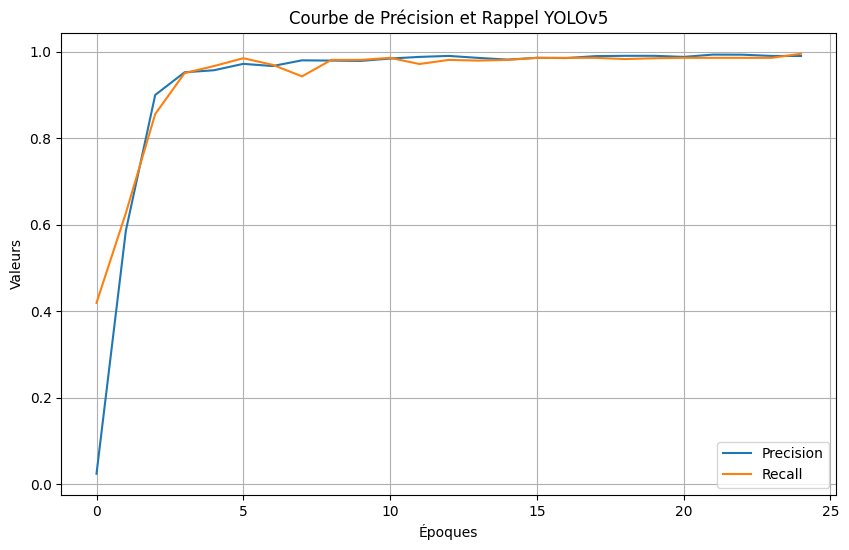

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display

results_path = '/content/drive/MyDrive/stage2024/yolov5/runs/train/yolov5s_results/results.csv'
df = pd.read_csv(results_path)

plt.figure(figsize=(10, 6))
plt.plot(df['   metrics/precision'], label='Precision')
plt.plot(df['      metrics/recall'], label='Recall')
plt.title('Courbe de Précision et Rappel YOLOv5')
plt.xlabel('Époques')
plt.ylabel('Valeurs')
plt.legend()
plt.grid(True)
precision_recall_plot_path = '/content/drive/MyDrive/stage2024/yolov5/runs/train/yolov5s_results/precision_recall_plot.png'
plt.savefig(precision_recall_plot_path)
plt.show()

#display(Image(filename=precision_recall_plot_path))


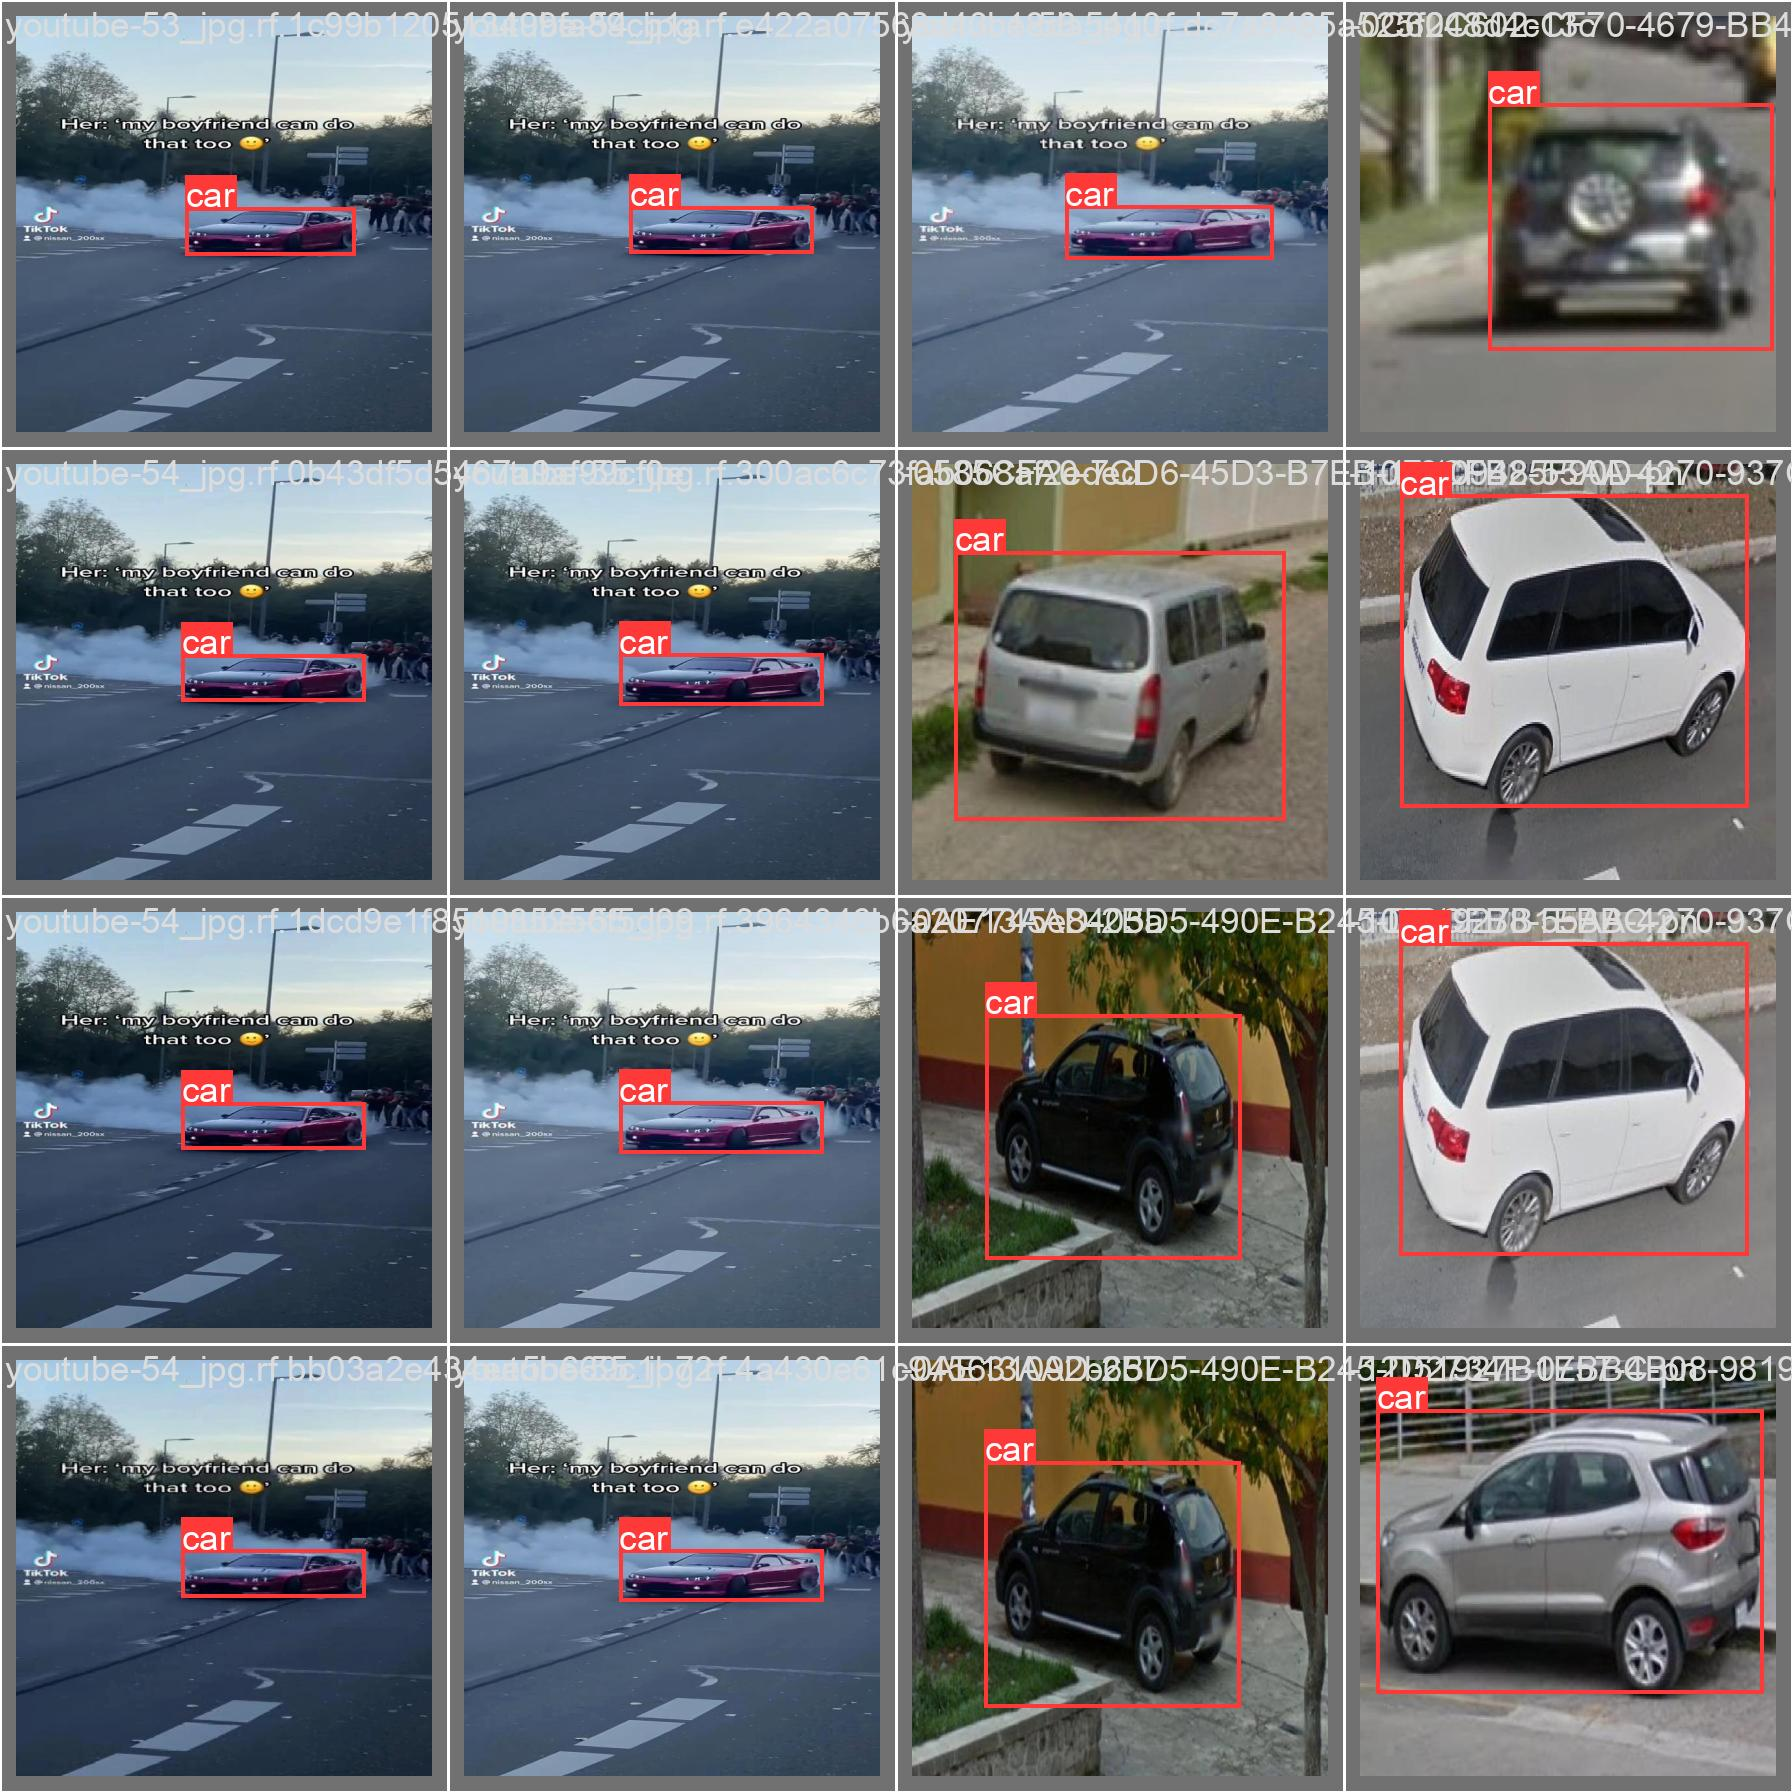

In [ ]:
Image(filename='/content/drive/MyDrive/stage2024/yolov5/runs/train/yolov5s_results/val_batch0_labels.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


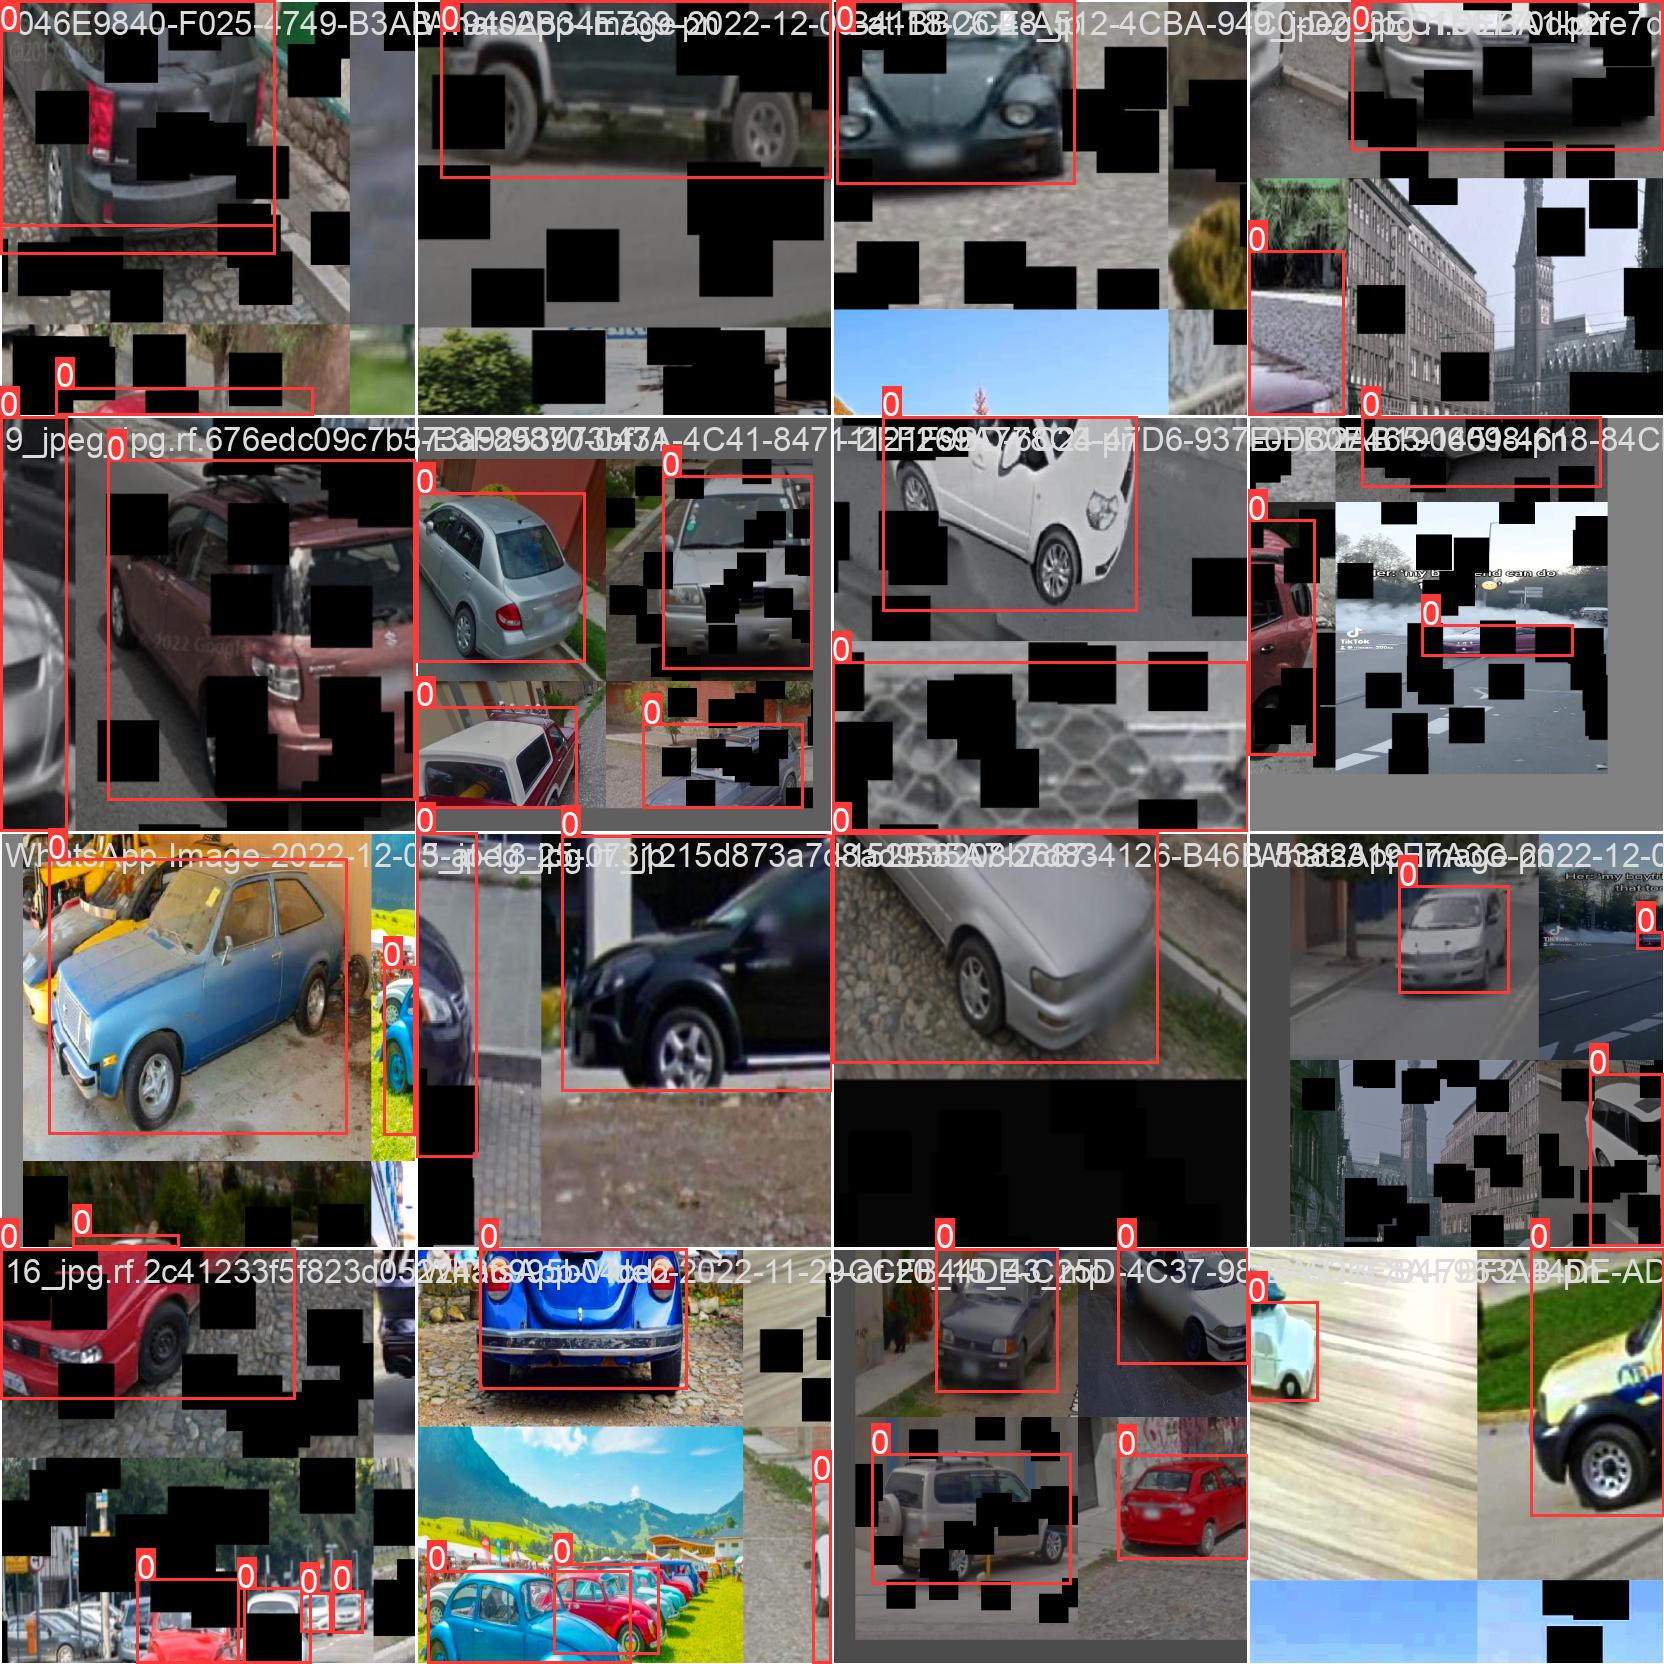

In [ ]:
# print out an augmented training example
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/content/drive/MyDrive/stage2024/yolov5/runs/train/yolov5s_results/train_batch0.jpg', width=900)

In [ ]:
%cd /content/drive/MyDrive/stage2024/yolov5

/content/drive/MyDrive/stage2024/yolov5


In [ ]:
%ls runs/

train/


In [ ]:
%ls runs/train/yolov5s_results/weights

best.pt  last.pt


In [ ]:
%cd /content/drive/MyDrive/stage2024/yolov5/
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.4 --source /content/drive/MyDrive/stage2024/yolov5/Cars-detecting-and-how-many-1/test/images


/content/drive/MyDrive/stage2024/yolov5
detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=/content/drive/MyDrive/stage2024/yolov5/Cars-detecting-and-how-many-1/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d8 Python-3.10.12 torch-2.3.1+cu121 CPU

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7246518 parameters, 0 gradients
image 1/105 /content/drive/MyDrive/stage2024/yolov5/Cars-detecting-and-how-many-1/test/images/-0378D390-5AE2-4D09-84BB-387E850F5E5A-png_jpg.rf.1068dad0ae9363c9ab8d5b09c6e298f4.jpg: 416x416 1 car, 508.0ms
image 2/105 /content/drive/MyDrive/stage2024/yolov5/Cars-

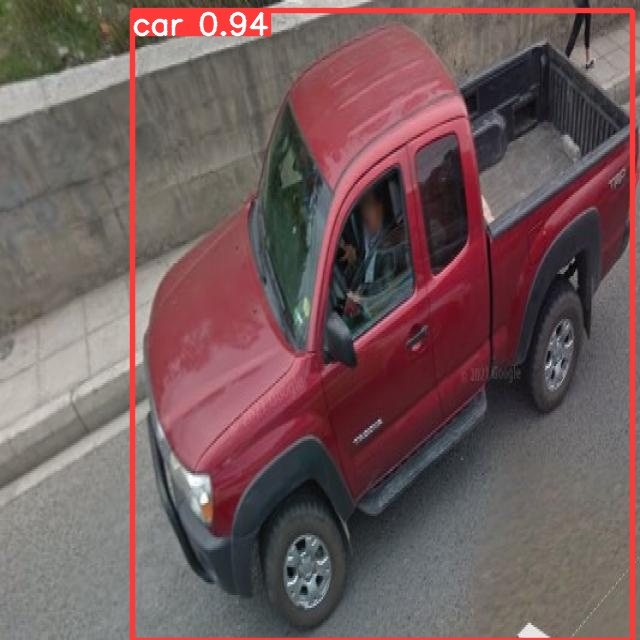

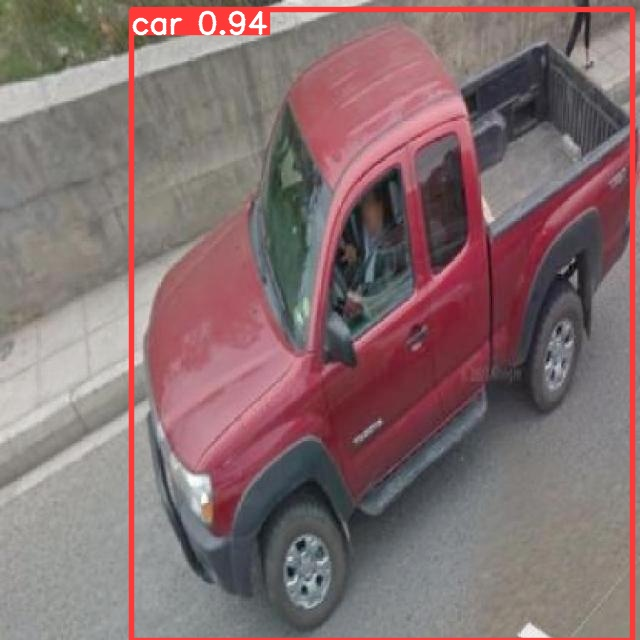

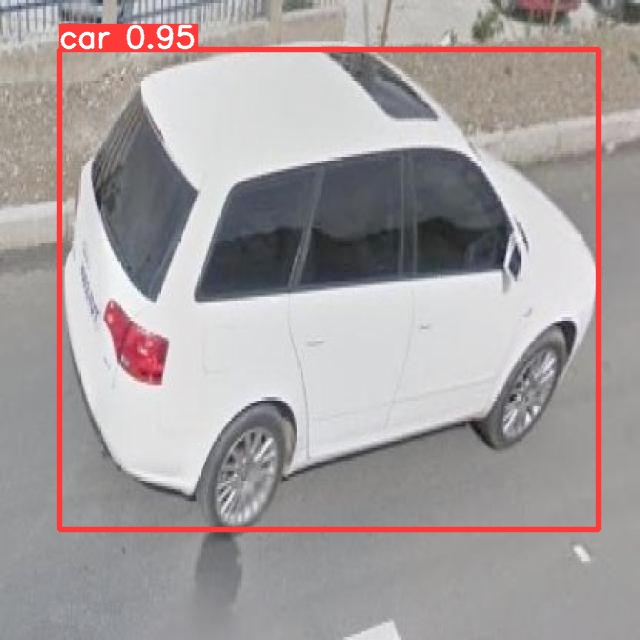

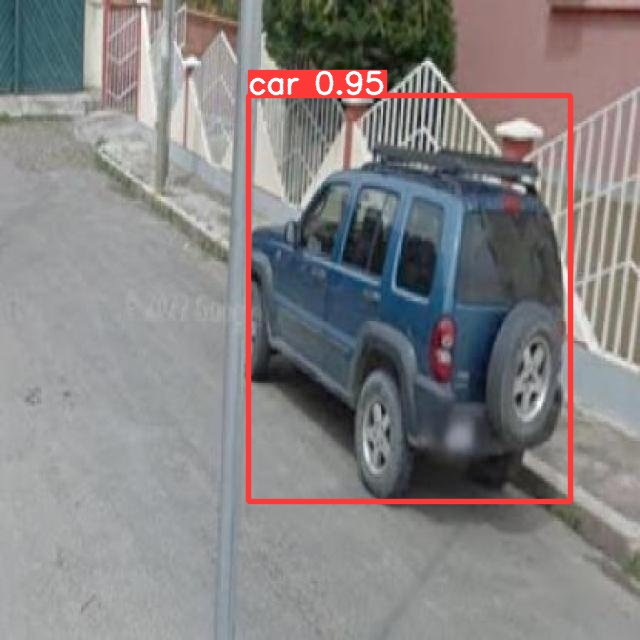

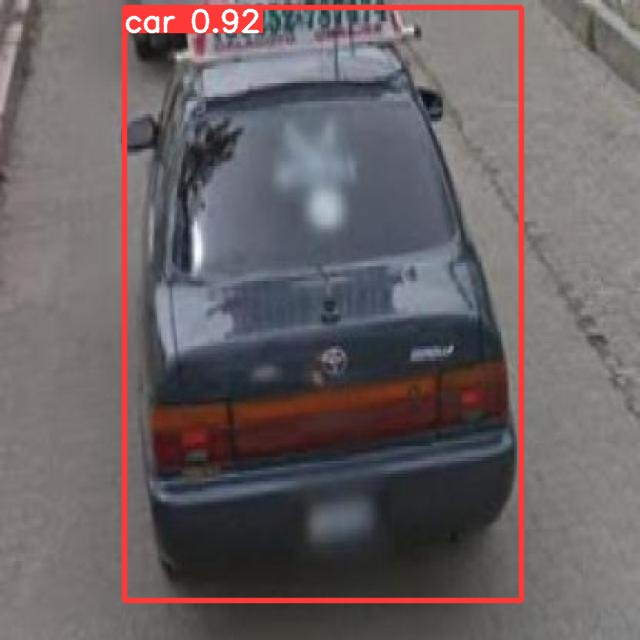

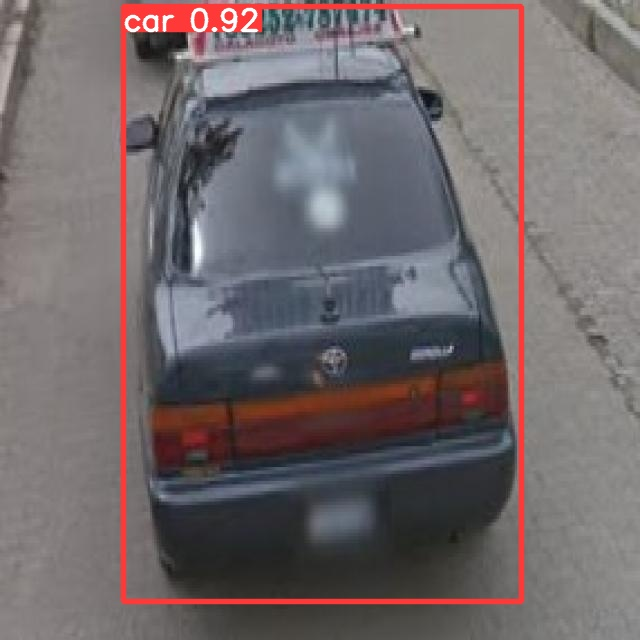

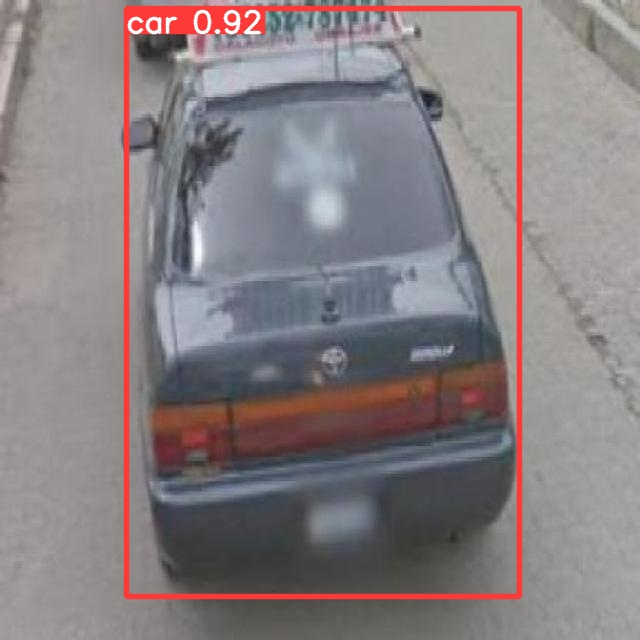

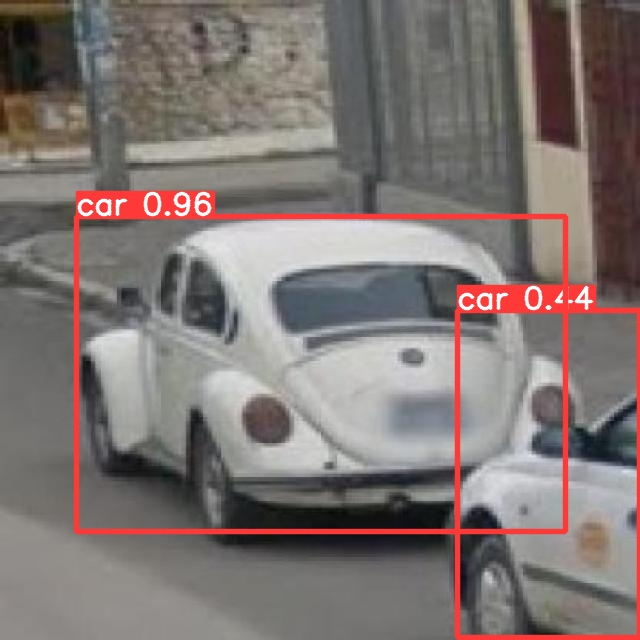

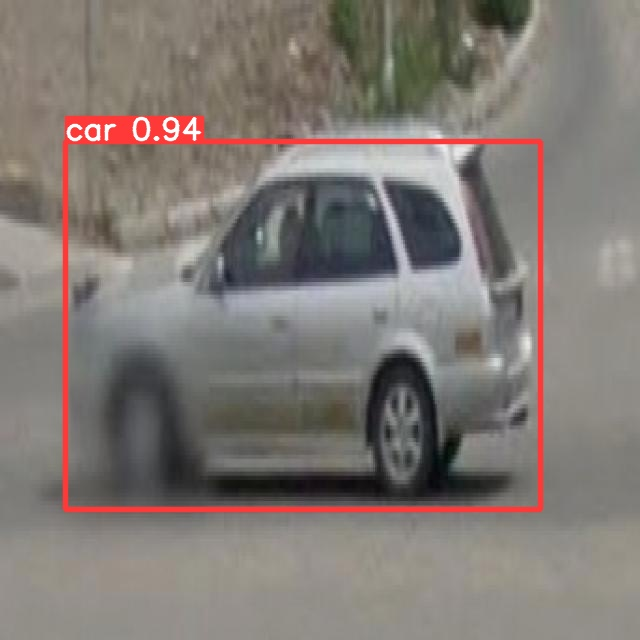

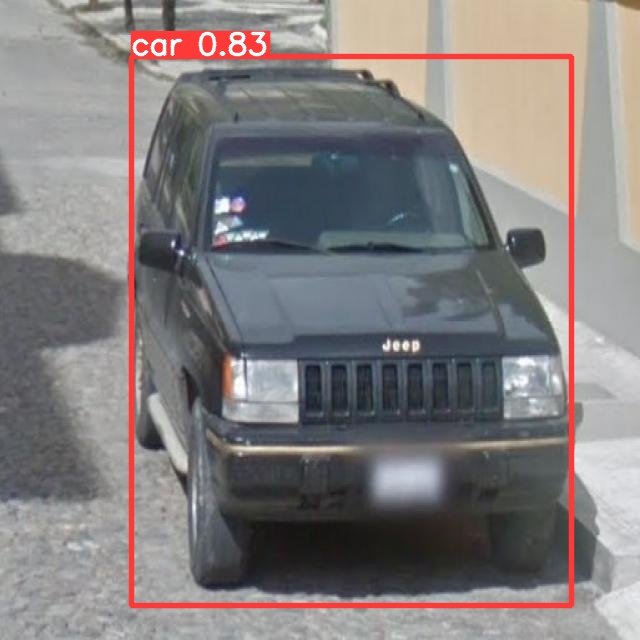

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/drive/MyDrive/stage2024/yolov5/runs/detect/exp2/*.jpg')[:10]:
    display(Image(filename=imageName))

In [ ]:
import pandas as pd

results_file = '/content/drive/MyDrive/stage2024/yolov5/runs/train/yolov5s_results/results.csv'
df = pd.read_csv(results_file, skipinitialspace=True)

precision = df['metrics/precision']
recall = df['metrics/recall']
mAP_50 = df['metrics/mAP_0.5']
mAP_95 = df['metrics/mAP_0.5:0.95']

avg_precision = precision.mean()
avg_recall = recall.mean()
avg_mAP_50 = mAP_50.mean()
avg_mAP_95 = mAP_95.mean()

print(f'Average Precision: {avg_precision}')
print(f'Average Recall: {avg_recall}')
print(f'Average mAP@0.5: {avg_mAP_50}')
print(f'Average mAP@0.5:0.95: {avg_mAP_95}')


Average Precision: 0.9248086
Average Recall: 0.9375568
Average mAP@0.5: 0.9328206000000001
Average mAP@0.5:0.95: 0.76801708


/usr/local/lib/python3.10/dist-packages/torch/hub.py:293: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


requirements: Ultralytics requirements ['gitpython>=3.1.30', 'pillow>=10.3.0', 'requests>=2.32.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 135.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 98.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0

requirements: AutoUpdate success ✅ 7.8s, installed 3 packages: ['gitpython>=3.1.30', 'pillow>=10.3.0', 'requests>=2.32.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-8-5 Python-3.10.12 torch-2.3.1+cu121 CPU

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7246518 parameters, 0 gradients
Adding AutoShape... 


Loading image from: /content/drive/MyDrive/car_test.jpg
Image loaded successfully.
Image converted to RGB.


image 1/1: 480x640 2 cars
Speed: 10.3ms pre-process, 570.3ms inference, 36.6ms NMS per image at shape (1, 3, 480, 640)


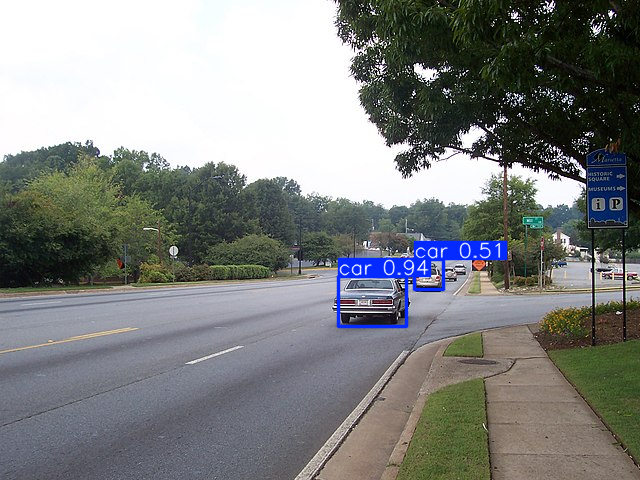

In [2]:
import os
import cv2
import torch
from matplotlib import pyplot as plt


# Load your trained model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/stage2024/yolov5/runs/train/yolov5s_results/weights/best.pt')

# Load the input image
img_path = '/content/drive/MyDrive/car_test.jpg'
print(f"Loading image from: {img_path}")
img = cv2.imread(img_path)

if img is not None:
    print("Image loaded successfully.")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print("Image converted to RGB.")

    # Run inference
    results = model(img_rgb)

    # Print results
    results.print()

    # Display the image with detections
    results.show()

    # Extract and print the number of cars detected
    detected_cars = len([x for x in results.xyxy[0] if int(x[5]) == 0])
    print(f"Number of cars detected: {detected_cars}")
else:
    print("Failed to load image.")



Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-8-5 Python-3.10.12 torch-2.3.1+cu121 CPU

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7246518 parameters, 0 gradients
Adding AutoShape... 


Loading image from: /content/drive/MyDrive/car_test3.jpg
Image loaded successfully.
Image converted to RGB.


image 1/1: 371x550 4 cars
Speed: 21.0ms pre-process, 380.4ms inference, 1.0ms NMS per image at shape (1, 3, 448, 640)


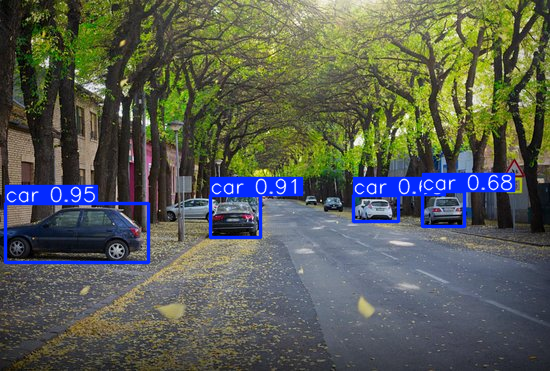

Number of cars detected: 4


In [3]:
import os
import cv2
import torch
from matplotlib import pyplot as plt


model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/stage2024/yolov5/runs/train/yolov5s_results/weights/best.pt')

img_path = '/content/drive/MyDrive/car_test3.jpg'
print(f"Loading image from: {img_path}")
img = cv2.imread(img_path)

if img is not None:
    print("Image loaded successfully.")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print("Image converted to RGB.")

    results = model(img_rgb)

    results.print()

    results.show()

    detected_cars = len([x for x in results.xyxy[0] if int(x[5]) == 0])
    print(f"Number of cars detected: {detected_cars}")
else:
    print("Failed to load image.")



Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-7-22 Python-3.10.12 torch-2.3.1+cu121 CPU

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7246518 parameters, 0 gradients
Adding AutoShape... 


Loading image from: /content/drive/MyDrive/images.jfif
Image loaded successfully.
Image converted to RGB.


image 1/1: 225x225 3 cars
Speed: 6.9ms pre-process, 440.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


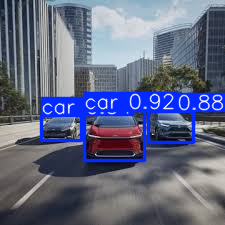

Number of cars detected: 3


In [4]:
import os
import cv2
import torch
from matplotlib import pyplot as plt


model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/stage2024/yolov5/runs/train/yolov5s_results/weights/best.pt')

img_path = '/content/drive/MyDrive/images.jfif'
print(f"Loading image from: {img_path}")
img = cv2.imread(img_path)

if img is not None:
    print("Image loaded successfully.")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print("Image converted to RGB.")

    results = model(img_rgb)

    results.print()

    results.show()

    detected_cars = len([x for x in results.xyxy[0] if int(x[5]) == 0])
    print(f"Number of cars detected: {detected_cars}")
else:
    print("Failed to load image.")

